In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dt = pd.read_csv('babies.csv')
# This was to get specifically data related to the baby's birth weight 
baby_weight = dt[['case','bwt']]
print(baby_weight.bwt.describe())

count    1236.000000
mean      119.576861
std        18.236452
min        55.000000
25%       108.750000
50%       120.000000
75%       131.000000
max       176.000000
Name: bwt, dtype: float64


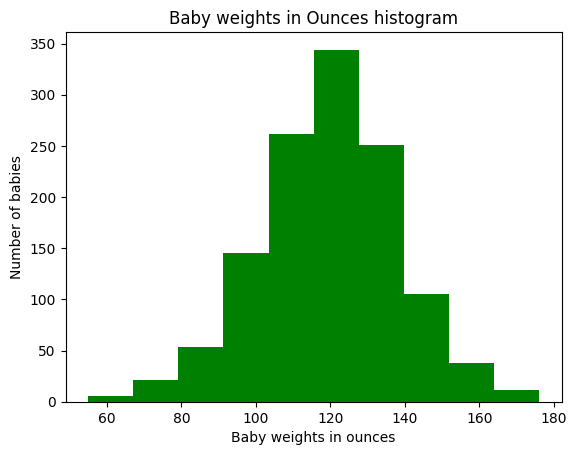

In [ ]:
# Before the Normal Distribution function is applied
plt.hist(baby_weight.bwt,color='green')
plt.xlabel('Baby weights in ounces')
plt.ylabel('Number of babies')
plt.title('Baby weights in Ounces histogram')
plt.show()

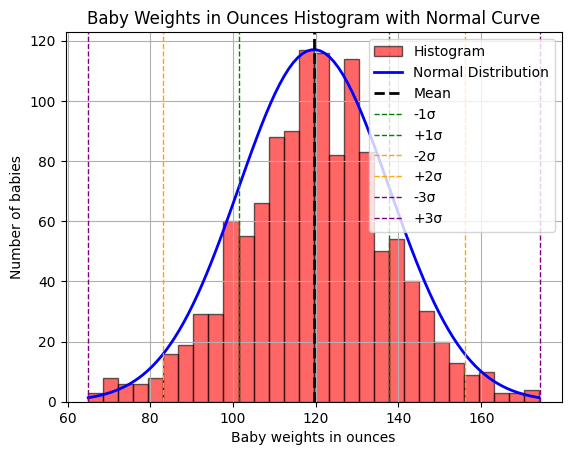

In [ ]:
mean_of_set = baby_weight.bwt.mean()
std = baby_weight.bwt.std()
clean_data = baby_weight.bwt[(baby_weight.bwt>(mean_of_set-3*std)) & (baby_weight.bwt<(mean_of_set+3*std)) ]
# This is the number of the weights that were outliers
#print(baby_weight.shape[0]-clean_data.shape[0])
x = np.linspace(clean_data.min(), clean_data.max(), 100)  # 100 points

# Normal distribution 
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_of_set) / std) ** 2)

counts, bins, _ = plt.hist(clean_data, bins=30, color='red', alpha=0.6, edgecolor='black', density=False, label='Histogram')

y = y * max(counts) / max(y)

# Overlay the bell curve
plt.plot(x, y, color='blue', linewidth=2, label='Normal Distribution')
#Mean and Standard Deviation  Lines showing their own range
plt.axvline(mean_of_set, color='black', linestyle='dashed', linewidth=2, label='Mean')
# Standard deviation ranges
for i, color in zip([1, 2, 3], ['green', 'orange', 'purple']):
    plt.axvline(mean_of_set - i * std, color=color, linestyle='dashed', linewidth=1, label=f'-{i}σ')
    plt.axvline(mean_of_set + i * std, color=color, linestyle='dashed', linewidth=1, label=f'+{i}σ')

plt.xlabel('Baby weights in ounces')
plt.ylabel('Number of babies')
plt.title('Baby Weights in Ounces Histogram with Normal Curve')
plt.legend()
plt.grid(True)
plt.show()


How does the distribution you were allocated vary from the other three you were not allocated ?

1 . This distribution follows a bell curve where the middle values are expected to be tightly grouped 
2. This distribution is mainly defined by the Mean, Standard deviation and MAD 
3 . Follows an empirical rule : first deviation covers 99.7% of values , second deviation covers 95% & third covers 68%

 Comparing them to the other distributions ,
 Uniform distribution : all outcomes are equally likely , 
Binomial Distribution : All outcomes are between two possible outcomes , 
Exponential : Models for the time until an event ,
 Poisson : Models how many times an event occurs in a span of time 

Would the question you chose be used in the context of a different distribution? 
Poisson : Predicting how many overweight or underweight babies are born 
Exponential : The waiting time between babies born 
Binomial : Define the health of the baby . If good weight , then success & if not , failure


Part 2: Bayesian Probability 

* $P(A|B)$ (Posterior Probability): The updated probability of event $A$ (hypothesis) given that event $B$ (evidence) has occurred
* $P(B|A)$ (Likelihood): The probability of observing evidence $B$ given that $A$ is true
* $P(A)$ (Prior Probability): The initial probability of $A$ before considering new evidence
* $P(B)$ (Marginal Probability / Evidence): The total probability of observing evidence $B$, regardless of whether $A$ is true or not

## Applying Bayes' Theorem to Fraud Detection

Let's assume we are developing a fraud detection system that flags suspicious transactions. We can use Bayesian probability to determine how likely a transaction is fraudulent given that it has been flagged by the system.

Using Bayes' Theorem:

$P(Fraud|Alert) = \frac{P(Alert|Fraud) \cdot P(Fraud)}{P(Alert)}$

Where:
* $P(Fraud)$ (Prior Probability): The probability that any given transaction is fraudulent before considering the alert system
* $P(Alert|Fraud)$ (Likelihood): The probability that a fraudulent transaction gets flagged by the system
* $P(Alert)$ (Evidence): The overall probability that any transaction is flagged

## Assumptions Based on Past Data

1. From past data, *2% of all transactions are fraudulent*:
   
   $P(Fraud) = 0.02$

2. If a transaction *is fraudulent, there's an **85% chance* it gets flagged:
   
   $P(Alert|Fraud) = 0.85$

3. If a transaction *is legitimate, there's a **5% chance* it still gets flagged as suspicious (false positive):
   
   $P(Alert|Not\;Fraud) = 0.05$

## Computing $P(Alert)$ using the Law of Total Probability

The total probability that a transaction is flagged is:

$P(Alert) = P(Alert|Fraud) \cdot P(Fraud) + P(Alert|Not\;Fraud) \cdot P(Not\;Fraud)$

Since $P(Not\;Fraud) = 1 - P(Fraud)$, we substitute:

$P(Alert) = (0.85 \times 0.02) + (0.05 \times 0.98)$

Using this, we can now compute the *posterior probability* $P(Fraud|Alert)$, which tells us how likely a transaction is fraudulent given that the system has flagged it.

---

This approach enables financial institutions to improve fraud detection, reducing false positives and ensuring better security for customers

The probability that the transaction is fraudulent given that it has been flagged by the system. (P(Fraud|Alert)) = 25.76%


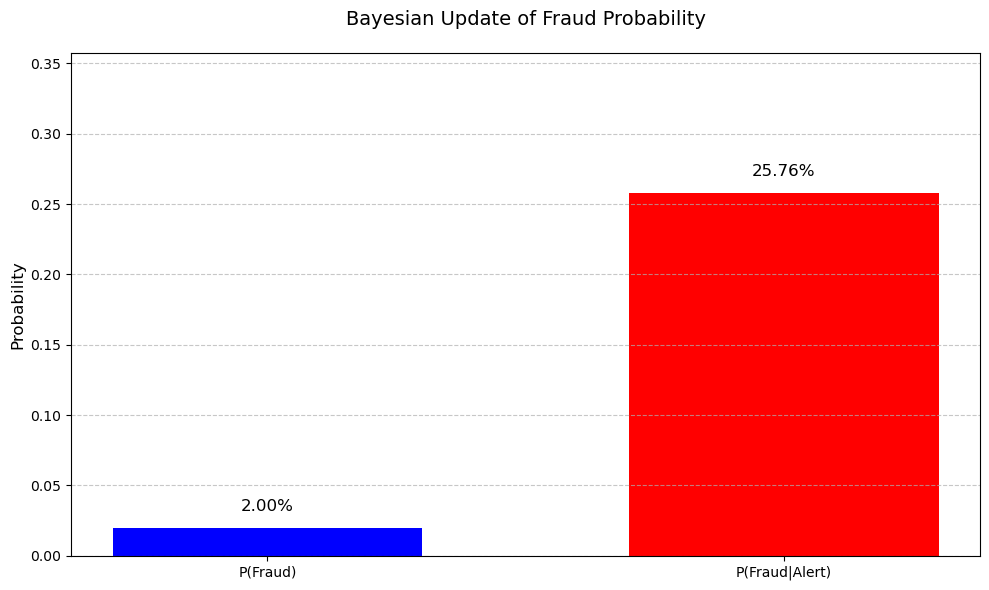

In [3]:
import math
import matplotlib.pyplot as plt

# Prior probabilities
p_fraud = 0.02  # P(Fraud)
p_not_fraud = 1 - p_fraud  # P(Not Fraud)

# Conditional probabilities
p_alert_given_fraud = 0.85  # P(Alert|Fraud)
p_alert_given_not_fraud = 0.05  # P(Alert|Not Fraud)

# Calculate total probability of alert using law of total probability
p_alert = (p_alert_given_fraud * p_fraud) + \
          (p_alert_given_not_fraud * p_not_fraud)  # P(Alert)

# Calculate posterior probability using Bayes' theorem
p_fraud_given_alert = (p_alert_given_fraud * p_fraud) / p_alert  # P(Fraud|Alert)

# Input validation
if not 0 <= p_fraud <= 1:
    raise ValueError("Probability must be between 0 and 1")

# Format percentage for display
formatted_percentage = f"{round((p_fraud_given_alert * 100), 2)}%"
print(f"The probability that the transaction is fraudulent given that it has been flagged by the system. (P(Fraud|Alert)) = {formatted_percentage}")

# Visualization
plt.figure(figsize=(10, 6))

# Create bar chart
probabilities_to_compare = ['P(Fraud)', 'P(Fraud|Alert)']
probability_values = [p_fraud, p_fraud_given_alert]

bars = plt.bar(probabilities_to_compare, probability_values, 
               color=['blue', 'red'],
               width=0.6)

# Customize chart appearance
plt.ylabel('Probability', fontsize=12)
plt.title('Bayesian Update of Fraud Probability', fontsize=14, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis limits with padding
plt.ylim(0, max(probability_values) + 0.1)

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height*100:.2f}%',
             ha='center', va='bottom', fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

**Practical Significance of Bayesian Inference**

Bayesian inference is a method of updating probabilities as new information becomes available. It has numerous real-world applications and aids in making more informed decisions based on data.

Bayesian inference is widely employed in fields such as finance (for risk assessment), artificial intelligence (in machine learning), and security (for fraud detection). It offers a systematic approach to refine predictions and minimize errors.

A key strength of Bayesian inference lies in its ability to balance prior knowledge with new data. This prevents overreacting to incoming information by integrating it with existing knowledge. This feature is particularly valuable in applications like spam filtering, recommendation systems, and autonomous vehicles, where decisions must be dynamically adjusted.

Furthermore, it is used in adaptive learning. Unlike fixed probability methods, Bayesian inference continuously updates beliefs. This adaptability makes it suitable for situations where conditions evolve over time, such as weather forecasting or medical diagnoses.

**Examples of Applications**

* Medical Diagnosis: Updating the probability of a disease based on test results.
* Spam Filtering: Adjusting the likelihood of an email being spam as new data is received.
* Weather Forecasting: Refining predictions with new weather data.
* Machine Learning: Helping algorithms learn and improve over time.

**In the context of our fraud detection example:**

* **Updating Beliefs:**
    * Before checking an alert, we know that fraud is rare (only 2% chance). However, if a transaction is flagged, we update our belief using Bayes' theorem. Instead of relying only on the general fraud rate, we now consider how likely the alert is when fraud happens versus when it doesn’t.
* **Better Decision-Making:**
    * Without Bayesian inference, we might think every flagged transaction is highly suspicious. But using the theorem, we see that even if an alert is triggered, the probability of actual fraud might not be as high as we expect. This helps in reducing false alarms and focusing on real fraud cases.

### Gradient Descent in Code

**Step 1: Initialize given values**

We set up X and Y based on the given data points.

Initialize m = -1 and b = 1 (starting values).

Define learning_rate, though SciPy manages step sizes internally.

In [13]:
import numpy as np
from scipy.optimize import minimize

# Given data points
X = np.array([1, 3])
Y = np.array([3, 6])

# Initial values of m and b
initial_params = np.array([-1, 1])  # m = -1, b = 1

# Learning rate (not directly used in SciPy minimize but important conceptually)
learning_rate = 0.1


**Step 2: Define Mean Squares Error Function**

The function calculates the Mean Squared Error (MSE).

It computes predictions (y_pred) using y = mx + b.

The loss is calculated as the average squared error between actual (Y) and predicted (y_pred) values.

In [14]:
# Define the cost function (MSE)
def mse(params, X, Y):
    m, b = params
    y_pred = m * X + b
    return np.mean((Y - y_pred) ** 2)


**Step 3: Compute the gradient**

This function calculates the gradients (partial derivatives) for m and b.
*italicized text*
These gradients show how to adjust m and b to reduce error.

In [15]:
# Compute the gradient (partial derivatives of MSE)
def mse_gradient(params, X, Y):
    m, b = params
    y_pred = m * X + b
    error = Y - y_pred
    grad_m = (-2 / len(X)) * np.sum(error * X)
    grad_b = (-2 / len(X)) * np.sum(error)
    return np.array([grad_m, grad_b])


**Step 4: Store and track m and b over iterations**

We store m and b at each iteration.

The callback() function saves values every time minimize() updates them.



In [17]:
# Store the history of m and b values for visualization
m_history = []
b_history = []

# Callback function to store values during optimization
def callback(params):
    m_history.append(params[0])
    b_history.append(params[1])


**Step 5: Optimize m and b using SciPy**

**scipy.optimize.minimize():**

Minimizes mse() (cost function).

Uses BFGS method (gradient-based optimization).

jac=mse_gradient passes the gradient function.

Callback function stores m and b values.

**Extracts final m and b values after optimization.**

In [18]:
# Optimize using SciPy's minimize function
result = minimize(mse, initial_params, args=(X, Y), method='BFGS', jac=mse_gradient, callback=callback)

# Extract optimized values
m_opt, b_opt = result.x
print(f"Optimized values: m = {m_opt:.4f}, b = {b_opt:.4f}")


Optimized values: m = 1.5000, b = 1.5000
